In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

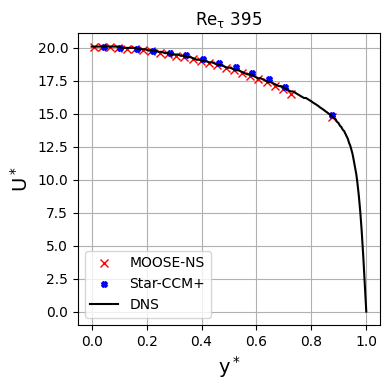

In [7]:
#### Ret 395 ####

### Comparison of axial velocity radial profiles at the outlet of the channel against DNS ###

#Compute u_tau MOOSE
nu = 2./14000. # Bulk Reynolds number
yd = 0.125 # Centroid distance from wall
yplus_ph = 49. # y+ value at the outlet (obtained from the simulation result)
u_tau_ph = yplus_ph*nu/yd

#Compute u_tau Star-CCM+
yplus_star = 48.67
u_tau_star = yplus_star*nu/yd

#Compute wall shear stress (rho = 1)
tau_w_ph = u_tau_ph*u_tau_ph
tau_w_star = u_tau_star*u_tau_star
u_tau_dns = 392.5*nu
tau_w_dns = u_tau_dns*u_tau_dns

#### Loading 
#Load DNS data
df_395 = pd.read_csv('Ret395.csv')
#Load StarCCM+ data
df_395_star = pd.read_csv('Ret395_star.csv')
df_395_star = df_395_star.drop_duplicates()
#Load MOOSE data
df_395_ph = pd.read_csv('Ret395_ph.csv')

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

# Plotting
#The velocities are normalized by u_tau
ax1.plot(df_395_ph['Points_1'][::2], df_395_ph['vel_0'][::2]/u_tau_ph, 'rx',markersize=6, label='MOOSE-NS')
ax1.plot(df_395_star['Line Probe 2: Centroid[Y] (m)'][1::2], 
         df_395_star['Line Probe 2: Velocity[i] (m/s)'][1::2]/u_tau_star, 'bX', markersize=4, label='Star-CCM+')
ax1.plot(1.0-df_395['y'], df_395['Umean'], 'k-', label='DNS')
ax1.set_xlabel(r'$\mathrm{y^*}$', fontsize=14)
ax1.set_ylabel(r'$\mathrm{U^*}$', fontsize=14)
ax1.legend()
ax1.grid(True)

plt.title(r'$\mathrm{Re_{\tau}~395}$')
plt.tight_layout()

# Save the figure
plt.savefig('plots_channel_u_395.pdf')

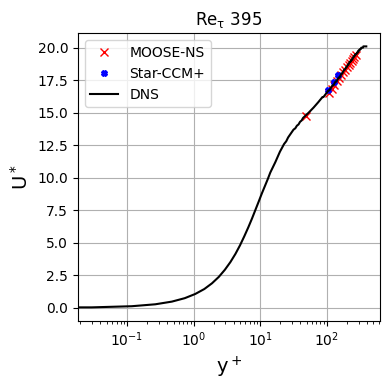

In [8]:
### Comparison of the law of the wall against DNS ###

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

# Plotting
ax1.semilogx((1.0-df_395_ph['Points_1'][::2][10:])*u_tau_ph/nu, df_395_ph['vel_0'][::2][10:]/u_tau_ph, 'rx', label='MOOSE-NS')
ax1.semilogx((1.0-df_395_star['Line Probe 2: Centroid[Y] (m)'][::2][10:])*u_tau_star/nu, 
             df_395_star['Line Probe 2: Velocity[i] (m/s)'][::2][10:]/u_tau_star, 'bX', markersize=4, label='Star-CCM+')
ax1.semilogx(df_395['y+'], df_395['Umean'], 'k-', label='DNS')
ax1.set_xlabel(r'$\mathrm{y^+}$', fontsize=14)
ax1.set_ylabel(r'$\mathrm{U^*}$', fontsize=14)
ax1.legend()
ax1.grid(True)

# Adjust layout
plt.title(r'$\mathrm{Re_{\tau}~395}$')
plt.tight_layout()

plt.savefig('plots_channel_lawofthewall_395.pdf')

In [93]:
### Comparing the wall shear stress against DNS ###
print('tau_w Moose: ',tau_w_ph )
print('tau_w Star: ',tau_w_star )
print('tau_w DNS: ',tau_w_dns )
print('Error %: ', 100*(tau_w_ph-tau_w_dns)/tau_w_dns)

tau_w Moose:  0.0031360000000000003
tau_w Star:  0.0030939022367346943
tau_w DNS:  0.003144005102040817
Error %:  -0.25461479167512413


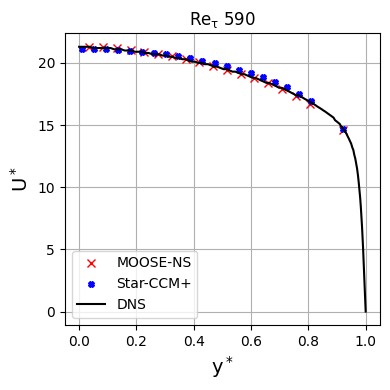

In [9]:
#### Ret 590 ####

### Comparison of axial velocity radial profiles at the outlet of the channel against DNS ###

#Compute u_tau MOOSE
nu = 2./22250. #Bulk Reynolds number
yd = 0.08 #Distance to wall-centroid
yplus_ph = 46.95 #y+ value at the outlet (obtained from the simulation result)
u_tau_ph = yplus_ph*nu/yd

#Compute u_tau Star-CCM+
yplus_star = 46.9
u_tau_star = yplus_star*nu/yd

#Compute wall shear stress (rho = 1)
tau_w_ph = u_tau_ph*u_tau_ph
tau_w_star = u_tau_star*u_tau_star
u_tau_dns = 587.2*nu
tau_w_dns = u_tau_dns*u_tau_dns

#### Loading
#Load DNS data
df_590 = pd.read_csv('Ret590.csv')
#Load Star-CCM+ data
df_590_star = pd.read_csv('Ret590_star.csv')
df_590_star = df_590_star.drop_duplicates()
#Load MOOSE-NS data
df_590_ph = pd.read_csv('Ret590_ph_test.csv')

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

# Plotting
ax1.plot(df_590_ph['Points_1'][1::2], df_590_ph['vel_0'][1::2]/u_tau_ph, 'rx', markersize=6, label='MOOSE-NS')
ax1.plot(df_590_star['Line Probe 2: Centroid[Y] (m)'][::2], 
         df_590_star['Line Probe 2: Velocity[i] (m/s)'][::2]/u_tau_star, 'bX', markersize=4, label='Star-CCM+')
ax1.plot(1.0-df_590['y'], df_590['Umean'], 'k-', label='DNS')
ax1.set_xlabel(r'$\mathrm{y^*}$', fontsize=14)
ax1.set_ylabel(r'$\mathrm{U^*}$', fontsize=14)
ax1.legend()
ax1.grid(True)

# Adjust layout
plt.title(r'$\mathrm{Re_{\tau}~590}$')
plt.tight_layout()

# Save the figure
plt.savefig('plots_channel_u_590.pdf')

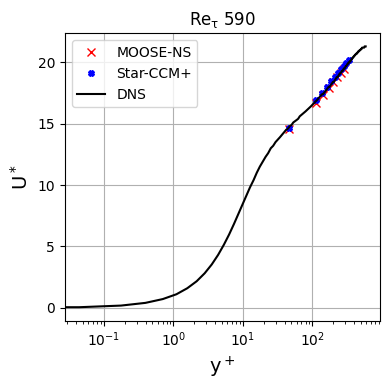

In [10]:
### Comparison of the law of the wall against DNS ###

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

# Plot the first dataset
ax1.semilogx((1.0-df_590_ph['Points_1'][1::2][10:])*u_tau_ph/nu, df_590_ph['vel_0'][1::2][10:]/u_tau_ph, 'rx', markersize=6, label='MOOSE-NS')
ax1.semilogx((1.0-df_590_star['Line Probe 2: Centroid[Y] (m)'][::2][10:])*u_tau_star/nu, 
             df_590_star['Line Probe 2: Velocity[i] (m/s)'][::2][10:]/u_tau_star, 'bX', markersize=4,  label='Star-CCM+')
ax1.semilogx(df_590['y+'], df_590['Umean'], 'k-', label='DNS')
ax1.set_xlabel(r'$\mathrm{y^+}$', fontsize=14)
ax1.set_ylabel(r'$\mathrm{U^*}$', fontsize=14)
ax1.legend()
ax1.grid(True)
#ax1.set_ylim([12,21])

# Adjust layout
plt.title(r'$\mathrm{Re_{\tau}~590}$')
plt.tight_layout()

plt.savefig('plots_channel_lawofthewall_590.pdf')

In [61]:
### Comparing the wall shear stress against DNS ###

print('tau_w Moose: ',tau_w_ph )
print('tau_w Star: ',tau_w_star )
print('tau_w DNS: ',tau_w_dns )
print('Error %: ', 100*(tau_w_ph-tau_w_dns)/tau_w_dns)

tau_w Moose:  0.002782858856205025
tau_w Star:  0.002776934730463325
tau_w DNS:  0.002785941896225225
Error %:  -0.11066418952876335
